<a href="https://colab.research.google.com/github/diancastroherrera-dot/Exposiciones-multicapa/blob/main/Red_multicapa_depresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* José Daniel Chacón Cool
* Marco Antonio Ramírez Arizpe

# Conjunto de datos

## Carga del dataset

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/RamirezArizpe/Ciencia-de-datos-para-negocios/refs/heads/main/student_depression_dataset.csv"
df = pd.read_csv(url)

## Visualización del dataframe original

---



In [ ]:
df


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27,Surat,Student,5,0,5.75,5,0,5-6 hours,Unhealthy,Class 12,Yes,7,1,Yes,0
27897,140686,Male,27,Ludhiana,Student,2,0,9.40,3,0,Less than 5 hours,Healthy,MSc,No,0,3,Yes,0
27898,140689,Male,31,Faridabad,Student,3,0,6.61,4,0,5-6 hours,Unhealthy,MD,No,12,2,No,0
27899,140690,Female,18,Ludhiana,Student,5,0,6.88,2,0,Less than 5 hours,Healthy,Class 12,Yes,10,5,No,1


# Procesamiento de datos

## Convertir valores string en int

In [ ]:
df['Gender'] = df['Gender'].replace({'Male': 0,'Female': 1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'No': 0, 'Yes': 1})
df['Financial Stress'] = df['Financial Stress'].replace({'Low': 1,'Medium': 2,'High': 3})
df['Depression'] = df['Depression'].replace({'No': 0,'Yes': 1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'No': 0,'Yes': 1})
df['Profession'] = df['Profession'].replace({
    'Architect': 0,
    'Chef': 1,
    'Civil Engineer': 2,
    'Content Writer': 3,
    'Digital Marketer': 4,
    'Digital Marketer':4,
    'Doctor': 5,
    'Educational Consultant': 6,
    'Entrepreneur': 7,
    'Lawyer': 8,
    'Manager': 9,
    'Pharmacist': 10,
    'Student': 11,
    'Teacher': 12,
    'UX/UI Designer': 13
})

df['Degree'] = df['Degree'].replace({
    # Licenciaturas
    'B.Arch': 1,
    'B.Com': 1,
    'B.Ed': 1,
    'B.Pharm': 1,
    'B.Tech': 1,
    'BA': 1,
    'BBA': 1,
    'BCA': 1,
    'BE': 1,
    'BHM': 1,
    'BSc': 1,
    'LLB': 1,

    # Maestrías
    'M.Com': 2,
    'M.Ed': 2,
    'M.Pharm': 2,
    'M.Tech': 2,
    'MA': 2,
    'MBA': 2,
    'MBBS': 2,
    'MCA': 2,
    'ME': 2,
    'MHM': 2,
    'MSc': 2,

    # Doctorados / Avanzados
    'PhD': 3,
    'MD': 3,
    'LLM': 3,

    # Preuniversitario
    'Class 12': 0,
    'Others': 0
})


df['Sleep Duration'] = df['Sleep Duration'].replace({
    'Less than 5 hours': 0,   # Muy poco sueño
    '5-6 hours': 1,           # Bajo
    '7-8 hours': 2,           # Adecuado / normal
    'More than 8 hours': 3    # Alto / más de lo recomendado
})

# Codificar ciudades según su frecuencia (1 = ciudad más común)
df['City'] = df['City'].astype(str).str.strip().str.title()
city_rank = {c: i+1 for i, c in enumerate(df['City'].value_counts().index)}
df['City_rank'] = df['City'].map(city_rank).astype(int)
df['Dietary Habits'] = df['Dietary Habits'].replace({'Unhealthy': 0,'Moderate': 1,'Healthy': 2})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace({'No': 0,'Yes': 1})

/tmp/ipython-input-2148331048.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0,'Female': 1})
/tmp/ipython-input-2148331048.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'No': 0, 'Yes': 1})
/tmp/ipython-input-2148331048.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_obje

## Visualizar el dataframe con valores convertidos

In [ ]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_rank
0,2,0,33,Visakhapatnam,11,5,0,8.97,2,0,1,2,1,1,3,1,0,1,13
1,8,1,24,Bangalore,11,2,0,5.90,5,0,1,1,1,0,3,2,1,0,21
2,26,0,31,Srinagar,11,3,0,7.03,5,0,0,2,1,0,9,1,1,0,2
3,30,1,28,Varanasi,11,3,0,5.59,2,0,2,1,1,1,4,5,1,1,25
4,32,1,25,Jaipur,11,4,0,8.13,3,0,1,1,2,1,1,1,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,1,27,Surat,11,5,0,5.75,5,0,1,0,0,1,7,1,1,0,9
27897,140686,0,27,Ludhiana,11,2,0,9.40,3,0,0,2,2,0,0,3,1,0,7
27898,140689,0,31,Faridabad,11,3,0,6.61,4,0,1,0,3,0,12,2,0,0,30
27899,140690,1,18,Ludhiana,11,5,0,6.88,2,0,0,2,0,1,10,5,0,1,7


## Estadísticos descriptivos de las variables que alimentarán el modelo

In [ ]:
df.describe()

,id,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_rank
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,0.442780,25.822300,10.993764,3.141214,0.000430,7.656104,2.943837,0.000681,1.398445,0.904018,1.165155,0.632809,7.156984,3.139529,0.483961,0.585499,13.147988
std,40641.175216,0.496724,4.905687,0.243990,1.381465,0.043992,1.470707,1.361148,0.044394,1.126792,0.797014,0.830187,0.482048,3.707642,1.437638,0.499752,0.492645,8.459886
min,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35039.000000,0.000000,21.000000,11.000000,2.000000,0.000000,6.290000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,0.000000,6.000000
50%,70684.000000,0.000000,25.000000,11.000000,3.000000,0.000000,7.770000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,8.000000,3.000000,0.000000,1.000000,12.000000
75%,105818.000000,1.000000,30.000000,11.000000,4.000000,0.000000,8.920000,4.000000,0.000000,2.000000,2.000000,2.000000,1.000000,10.000000,4.000000,1.000000,1.000000,20.000000
max,140699.000000,1.000000,59.000000,13.000000,5.000000,5.000000,10.000000,5.000000,4.000000,3.000000,2.000000,3.000000,1.000000,12.000000,5.000000,1.000000,1.000000,48.000000


## Definir parámetros y target

In [ ]:
features = [
    'Gender', 'Age', 'Profession', 'Academic Pressure', 'Work Pressure',
    'CGPA', 'Study Satisfaction', 'Job Satisfaction',
    'Sleep Duration', 'Dietary Habits', 'Degree',
    'Have you ever had suicidal thoughts ?',
    'Work/Study Hours', 'Financial Stress',
    'Family History of Mental Illness',
    'City_rank'
]

X = df[features].values

# Target binario (0,1)
y = df['Depression'].values


## Dividir el conjunto de datos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

## Normalización de los parámtetros que entrarán al modelo

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc   = scaler.transform(X_val)
X_test_sc  = scaler.transform(X_test)

# Red neuronal multicapa

## Definición del modelo de red neuronal

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(42)

model = Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu', input_shape=(X_train_sc.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # salida probabilística binaria [0,1]
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compilación del modelo

## Creación de un optimizador ADAM con una tasa de aprendizaje del 0.001

In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001

## Estableciendo funciones de pérdida y métricas de evaluación.

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='binary_crossentropy', # para binarios
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=15, restore_best_weights=True
)

# Entrenamiento del modelo

In [ ]:
history = model.fit(
    X_train_sc, y_train,
    validation_data=(X_val_sc, y_val),
    epochs=200,
    batch_size=64,
    verbose=1,
    callbacks=[early]
)

Epoch 1/200
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8116 - auc: 0.8852 - loss: 0.4269 - val_accuracy: 0.8409 - val_auc: 0.9133 - val_loss: 0.3651
Epoch 2/200
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8466 - auc: 0.9172 - loss: 0.3583 - val_accuracy: 0.8444 - val_auc: 0.9129 - val_loss: 0.3656
Epoch 3/200
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - auc: 0.9187 - loss: 0.3553 - val_accuracy: 0.8448 - val_auc: 0.9128 - val_loss: 0.3658
Epoch 4/200
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8466 - auc: 0.9195 - loss: 0.3536 - val_accuracy: 0.8444 - val_auc: 0.9126 - val_loss: 0.3664
Epoch 5/200
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8482 - auc: 0.9202 - loss: 0.3518 - val_accuracy: 0.8448 - val_auc: 0.9128 - val_loss: 0.3663
Epoch 6/200
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8485 - auc: 0.9210 - loss: 0.3502 - val_accuracy: 0.8455 - val_auc: 0.9127 - val_loss: 0.3667
Epoch 7/200
349/349 ━━━━━━━━━━━━━━

# Graficando función de pérdida

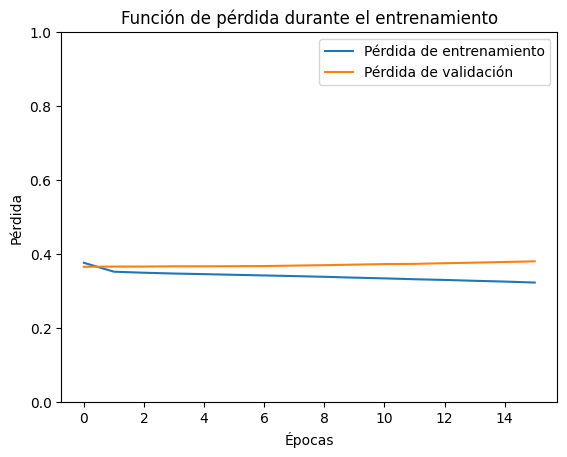

In [ ]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.ylim(0,1)
plt.show()


# Graficando Accuracy

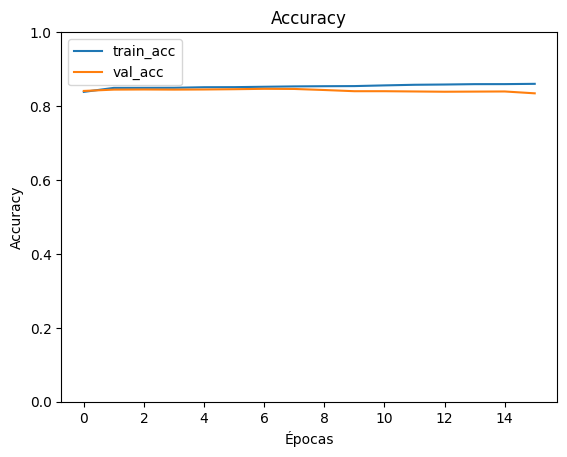

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Épocas'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.ylim(0,1)
plt.legend(); plt.show()


# Evaluación del modelo

In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
proba_test = model.predict(X_test_sc).ravel()
pred_test  = (proba_test >= 0.3).astype(int) # umbral 0.3

print("\n== Resultados en TEST ==")
print("Accuracy:", accuracy_score(y_test, pred_test))
print("F1:", f1_score(y_test, pred_test))
print("AUC:", roc_auc_score(y_test, proba_test))
print("\nClassification report:\n", classification_report(y_test, pred_test, digits=3))
print("Matriz de confusión:\n", confusion_matrix(y_test, pred_test))

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

== Resultados en TEST ==
Accuracy: 0.8222859190254389
F1: 0.8624514697726012
AUC: 0.9186623067084608

Classification report:
               precision    recall  f1-score   support

           0      0.904     0.640     0.749      1157
           1      0.789     0.952     0.862      1634

    accuracy                          0.822      2791
   macro avg      0.846     0.796     0.806      2791
weighted avg      0.836     0.822     0.815      2791

Matriz de confusión:
 [[ 740  417]
 [  79 1555]]


## Graficando la matriz de confusión

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


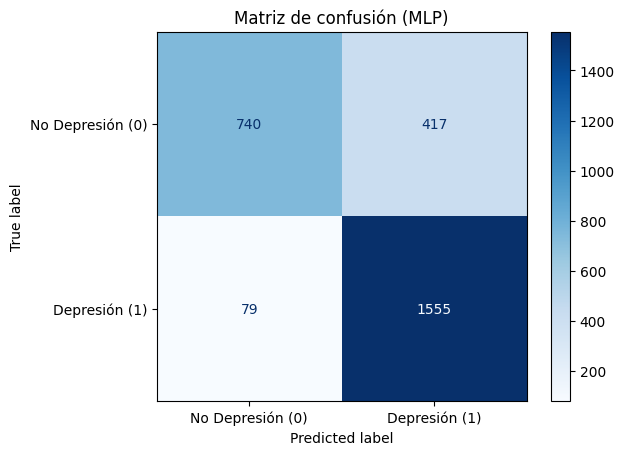

Accuracy: 0.8222859190254389
Precision (clase 1): 0.7885395537525355
Recall/Sensibilidad (clase 1): 0.9516523867809058
F1 (clase 1): 0.8624514697726012
AUC: 0.9186623067084608


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Probabilidades y clase predicha
proba_test = model.predict(X_test_sc).ravel()
y_pred = (proba_test >= 0.3).astype(int)
y_true = y_test

# Matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(
    confusion_matrix(y_true, y_pred),
    display_labels=['No Depresión (0)', 'Depresión (1)']
)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión (MLP)')
plt.show()

# Métricas clave
print("Accuracy:", (y_pred == y_true).mean())
print("Precision (clase 1):", precision_score(y_true, y_pred))
print("Recall/Sensibilidad (clase 1):", recall_score(y_true, y_pred))
print("F1 (clase 1):", f1_score(y_true, y_pred))
print("AUC:", roc_auc_score(y_true, proba_test))


# Probando predicción del modelo

## Insertando datos manualmente por alumno

In [ ]:
print("""
Sexo: 0 = Hombre | 1 = Mujer
Profesión:
  0 = Arquitecto/a, 1 = Chef, 2 = Ingeniero/a civil, 3 = Escritor/a de contenido, 4 = Especialista en marketing digital,
  5 = Doctor/a, 6 = Consultor/a educativo/a, 7 = Emprendedor/a, 8 = Abogado/a, 9 = Gerente,
  10 = Farmacéutico/a, 11 = Estudiante, 12 = Docente, 13 = Diseñador/a UX/UI
Horas de sueño: 0 = Menos de 5 horas | 1 = De 5 a 6 horas | 2 = De 7 a 8 horas | 3 = Más de 8 horas
Hábitos alimenticios: 0 = Poco saludables | 1 = Moderados | 2 = Saludables
Grado académico: 0 = Bachillerato (Class 12) | 1 = Licenciatura | 2 = Maestría | 3 = Doctorado o nivel avanzado
¿Has tenido pensamientos o ideas suicidas?: 0 = No | 1 = Sí
¿En tu familia hay antecedentes de trastornos mentales?: 0 = No | 1 = Sí
Estrés financiero: 1 = Bajo | 2 = Medio | 3 = Alto
Ciudad: usar número entero ≥ 1 (ranking de frecuencia en el dataset)

Escalas adicionales:
- Presión académica: 0(nada presionado) a 5(Totalmente presionado)
- Presión laboral: 0(nada presionado) a 5(Totalmente presionado)
- Satisfacción con los estudios: 0(nada satisfecho) a 5(totalmente satisfecho)
- Satisfacción laboral: 0(nada satisfecho) a 5(totalmente satisfecho)
- Horas de trabajo o estudio: 0 a 12
- Promedio (CGPA): 0.0 a 10.0
Edad: 18 a 59
""")


def pedir_entero(pregunta, minimo, maximo, opcional=False):
    """
    Solicita un entero dentro del rango [minimo, maximo].
    Si opcional=True, permite dejar vacío (devuelve None).
    """
    while True:
        prompt = f"{pregunta} ({minimo}-{maximo}" + (", o vacío" if opcional else "") + "): "
        s = input(prompt).strip()
        if s == "" and opcional:
            return None
        if s.isdigit():
            val = int(s)
            if minimo <= val <= maximo:
                return val
        print("Ingresa un número válido dentro del rango.")

def pedir_decimal(pregunta, minimo, maximo):
    """
    Solicita un número decimal dentro del rango.
    """
    while True:
        s = input(f"{pregunta} ({minimo}-{maximo}): ").strip()
        try:
            val = float(s)
            if minimo <= val <= maximo:
                return val
            else:
                print("Valor fuera de rango.")
        except ValueError:
            print("Debe ser un número decimal válido.")

registros = []
while True:
    print("\n--- Nuevo registro ---")

    fila = {
        'Gender': pedir_entero("Sexo (0=Hombre, 1=Mujer)", 0, 1),
        'Age': pedir_entero("Edad", 18, 59),
        'Profession': pedir_entero("Profesión (0–13)", 0, 13),
        'Academic Pressure': pedir_entero("Presión académica", 0, 5),
        'Work Pressure': pedir_entero("Presión laboral", 0, 5),
        'CGPA': pedir_decimal("Promedio (CGPA)", 0, 10),
        'Study Satisfaction': pedir_entero("Satisfacción con los estudios", 0, 5),
        'Job Satisfaction': pedir_entero("Satisfacción laboral", 0, 5),
        'Sleep Duration': pedir_entero("Horas de sueño (0–3)", 0, 3),
        'Dietary Habits': pedir_entero("Hábitos alimenticios (0–2)", 0, 2),
        'Degree': pedir_entero("Grado académico (0–3)", 0, 3),
        'Have you ever had suicidal thoughts ?': pedir_entero("¿Pensamientos o ideas suicidas? (0=No,1=Sí)", 0, 1),
        'Work/Study Hours': pedir_entero("Horas de trabajo o estudio", 0, 12),
        'Financial Stress': pedir_entero("Estrés financiero (1–3)", 1, 3),
        'Family History of Mental Illness': pedir_entero("Antecedentes familiares de trastornos mentales (0=No,1=Sí)", 0, 1),
        'City_rank': pedir_entero("Ciudad (ranking ≥1, o vacío si no sabes)", 1, 1000, opcional=True)
    }

    registros.append(fila)
    cont = input("¿Agregar otro estudiante? (s/n): ").strip().lower()
    if cont != 's':
        break

nuevos = pd.DataFrame(registros)
mediana_ciudad = int(df['City_rank'].median())
nuevos['City_rank'] = nuevos['City_rank'].fillna(mediana_ciudad)




Sexo: 0 = Hombre | 1 = Mujer
Profesión:
  0 = Arquitecto/a, 1 = Chef, 2 = Ingeniero/a civil, 3 = Escritor/a de contenido, 4 = Especialista en marketing digital,
  5 = Doctor/a, 6 = Consultor/a educativo/a, 7 = Emprendedor/a, 8 = Abogado/a, 9 = Gerente,
  10 = Farmacéutico/a, 11 = Estudiante, 12 = Docente, 13 = Diseñador/a UX/UI
Horas de sueño: 0 = Menos de 5 horas | 1 = De 5 a 6 horas | 2 = De 7 a 8 horas | 3 = Más de 8 horas
Hábitos alimenticios: 0 = Poco saludables | 1 = Moderados | 2 = Saludables
Grado académico: 0 = Bachillerato (Class 12) | 1 = Licenciatura | 2 = Maestría | 3 = Doctorado o nivel avanzado
¿Has tenido pensamientos o ideas suicidas?: 0 = No | 1 = Sí
¿En tu familia hay antecedentes de trastornos mentales?: 0 = No | 1 = Sí
Estrés financiero: 1 = Bajo | 2 = Medio | 3 = Alto
Ciudad: usar número entero ≥ 1 (ranking de frecuencia en el dataset)

Escalas adicionales:
- Presión académica: 0(nada presionado) a 5(Totalmente presionado)
- Presión laboral: 0(nada presionado) a 

/tmp/ipython-input-1175331202.py:87: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nuevos['City_rank'] = nuevos['City_rank'].fillna(mediana_ciudad)


### Almacenando los nuevos registros a evaluar


In [ ]:
nuevos = nuevos[features]
nuevos_scaled = scaler.transform(nuevos)
umbral = 0.3
prob = model.predict(nuevos_scaled).ravel()
pred = (prob >= umbral).astype(int)


resultados = nuevos.copy()
resultados['Probabilidad_de_depresion'] = prob
resultados['Etiqueta'] = np.where(pred == 1, 'Depresión', 'No depresión')

print("\n RESULTADOS")
print(resultados[['Probabilidad_de_depresion', 'Etiqueta']])

#nuevos.to_csv('respuestas_alumnos.csv', index=False)
#resultados.to_csv('predicciones_alumnos.csv', index=False)
#print("\nArchivos guardados:")
#print("  - respuestas_alumnos.csv")
#print("  - predicciones_alumnos.csv")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

 RESULTADOS
   Probabilidad_de_depresion      Etiqueta
0               3.941732e-11  No depresión
